In [4]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp
import pandas as pd

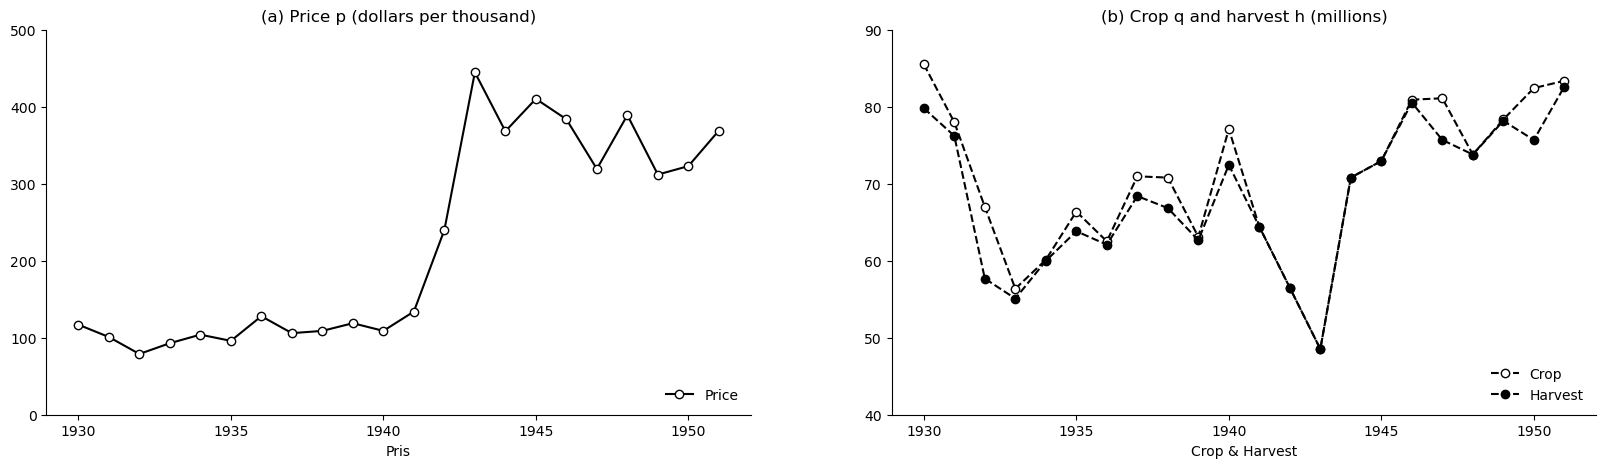

In [5]:
#Oppgave 7.1:1


#Henter inn relevant data og lager en ny dataframe for å jobbe i slik at den originale kan hentes fram på nytt hvis nødvendig.

df=pd.read_csv("https://uit-sok-1006-v23.github.io/data/suits_watermelons.csv",delimiter=";")


df1=df[["Year", "log p", "log q", "log h"]].copy()


#Lager likningene som skal plottes i grafen.

df1["p"] = np.exp(df1["log p"])
df1["q"] = np.exp(df1["log q"])
df1["h"] = np.exp(df1["log h"])

p_num=np.linspace(30,50,2)

def create_ax2():
                fig, axs = plt.subplots(1,2, sharey=False, figsize=(20,5))
                for i in range(2):
                    axs[i].spines['top'].set_color('none')
                    axs[i].spines['right'].set_color('none')
                return fig, axs

fig, axs = create_ax2()


#Gir navn til x aksene i begge grafene.

axs[0].set_xlabel('Pris', loc='center')
axs[1].set_xlabel('Crop & Harvest', loc='center')

#legger in en Y-limit for å få de samme verdiene på y-aksene som i de orginale grafene.

axs[0].set(ylim=(0,500))
axs[1].set(ylim=(40,90))


    
#Plotter Pris, Crop og Harvest linjene i en graf på en måte lik de orginale.    
            
axs[0].plot(df1["Year"], df1["p"], color="black", marker="o", markerfacecolor="white", label='Price')
axs[1].plot(df1["Year"], df1["q"], linestyle="dashed", color="black", marker="o", markerfacecolor="white", label='Crop')
axs[1].plot(df1["Year"], df1["h"], linestyle="dashed", color="black", marker="o", label='Harvest')

axs[0].set_title('(a) Price p (dollars per thousand)')
axs[1].set_title('(b) Crop q and harvest h (millions)')

#Lager legender for og vise hva som er hva av linjene i de plottede grafene
axs[0].legend(loc='lower right',frameon=False)
axs[1].legend(loc='lower right',frameon=False)

In [6]:
#Oppgave 7.1:2a,b,c

#Q range som vil bli brukt til å starte tabellen og hva mye av de verdiene som er i kolonnene til høyre er basert på.

Q = range(20, 105, 5)

#Lager tabellen slik at vi kan få de rette verdiene ved bruk av np.log og np.exp

dftabell = pd.DataFrame(Q, columns=['Q'])
dftabell['LogQ']=np.log(Q)
dftabell['Supply(logP)']= -2.0 + 1.7*np.log(dftabell['Q'])
dftabell['Demand(logP)']= 8.5 - 0.82*np.log(dftabell['Q'])
dftabell['Supply(P)']= np.exp(dftabell['Supply(logP)'])
dftabell['Demand(P)']= np.exp(dftabell['Demand(logP)'])

#La til det nye tilbudet(både logP og P) som instruert i oppgave 7.1:3a og 3b.
dftabell['New Supply(logP)']= -2.0 + 1.7*np.log(dftabell['Q']) + 0.4
dftabell['New Supply(P)']= np.exp(dftabell['New Supply(logP)'])

dftabell

,Q,LogQ,Supply(logP),Demand(logP),Supply(P),Demand(P),New Supply(logP),New Supply(P)
0,20,2.995732,3.092745,6.043500,22.037485,421.365040,3.492745,32.876064
1,25,3.218876,3.472089,5.860522,32.203943,350.907208,3.872089,48.042638
2,30,3.401197,3.782036,5.711018,43.905322,302.178574,4.182036,65.499044
3,35,3.555348,4.044092,5.584615,57.059336,266.297629,4.444092,85.122526
4,40,3.688879,4.271095,5.475119,71.600000,238.678832,4.671095,106.814648
5,45,3.806662,4.471326,5.378537,87.472655,216.704952,4.871326,130.493867
6,50,3.912023,4.650439,5.292141,104.630920,198.768561,5.050439,156.090990
7,55,4.007333,4.812466,5.213987,123.034698,183.825472,5.212466,183.546201
8,60,4.094345,4.960386,5.142637,142.648813,171.166618,5.360386,212.807022
9,65,4.174387,5.096458,5.077002,163.442028,160.292847,5.496458,243.826854


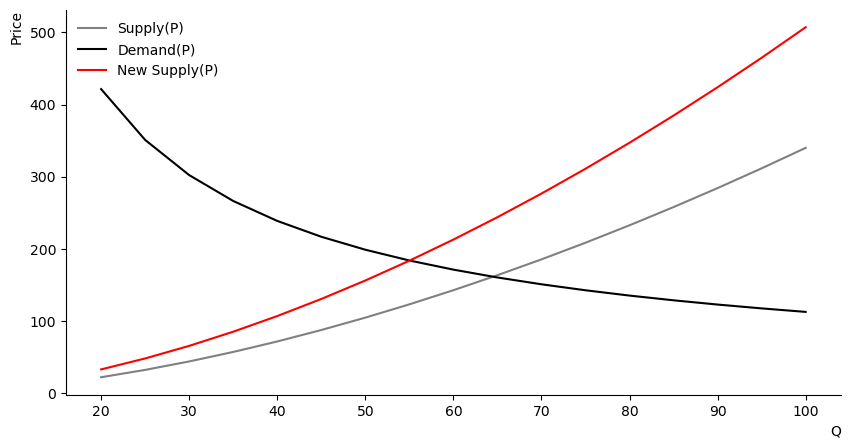

In [7]:
#7.1:2d
#7.1:3b

#Her plotter vi tilbud og etterspørsel fra tabellen.
p_num=np.linspace(20,50,2)

def create_ax3():
                fig, axs = plt.subplots(1, figsize=(10,5))
                for i in range(1):
                    axs.spines['top'].set_color('none')
                    axs.spines['right'].set_color('none')
                return fig, axs

fig, axs = create_ax3()

axs.set_xlabel('Q', loc='right')
axs.set_ylabel('Price', loc='top')


axs.plot(dftabell['Q'], dftabell['Supply(P)'], color='Gray', label='Supply(P)')
axs.plot(dftabell['Q'], dftabell['Demand(P)'], color='Black', label='Demand(P)')
axs.plot(dftabell['Q'], dftabell['New Supply(P)'], color='Red', label='New Supply(P)') #Her er det tilføyde plottet av sjokk tilbudet(New Supply).
axs.legend(loc='best',frameon=False)

In [12]:
#7.2:1a

q, p= sp.symbols('q, p', real=True, positive=True)
likning1 = sp.Eq(-2 + 1.7*sp.log(q), sp.log(p))

sp.solve(likning1, sp.log(q))

#Her ser vi etter tilbudselastisiteten(utregningen med log(p) bak seg) som er 0.5882. Dette betyr at tilbudet er uelastisk.

[0.588235294117647*log(p) + 1.17647058823529]

In [13]:
#7.2:1b
q, p= sp.symbols('q, p', real=True, positive=True)
likning2 = sp.Eq(8.5 - 0.82*sp.log(q), sp.log(p))

sp.solve(likning2, sp.log(q))

#Her ser vi etter etterspørselselastisiteten(utregningen med log(p) bak seg) som er 1.2195. Dette betyr at etterspørselen er elastisk.

[10.3658536585366 - 1.21951219512195*log(p)]

In [ ]:
#7.2:2 

#Vannmeloner har klart høyest koeffesient. Noe som sir oss at vannmeloner vil være det som er mest lønnsomt for bøndene og produsere.
#Bomull derimot har en negativ koeffesient. Vi kan dra ut av dette at det ikke vil være lønnsomt å produsere dette.
#Derimot så er Bomulls programmet positivt? Dette er fordi den Amerikanske staten kompanserte bønder for å ikke produsere bomull for å holde bomulls prisen oppe.
#Bøndene fikk tilbakebetalt en kompensasjon omtrent størrelsen av reduksjonen i bomulls produksjon.
#Dette forklarer hvorfor Bomulls programmet har en positiv koeffesient.
#Grønnsaker er det ikke mye å tjene på ettersom at de har en negativ koeffesient, så vannmeloner er det beste å satse på.
#Alt her utenom vannmeloner er eksterne faktorer som er med på å påvirke hva bonden skal produsere.
#Enda en er WW2, er USA med i krigen ville koeffesienten blitt høyere og han ville ha plantet mer.

In [ ]:
#7.2:3

#Prisen av varer er en av tingene som kommer i betrakning når en kunde skal kjøpe en vare.
#Vi ser at etterspørsels koeffesienten til prisen av vannmeloner og frakt med togbane er negativ.
#Vi har først og fremst prisen på vannmeloner, også i tillegg til prisen fra og frakte dem med tog, noe som vil øke prisen på vannmeloner.
#Dette vil være med på å gjøre vannmeloner dyrere og derfor kanskje litt mindre attraktivt på markedet for kunder.

In [ ]:
#7.2:4

#Eksempel 1

#Et eksempel er f.eks i jordbruk. Det har vært et ufattelig fint år med fine vær forhold for bøndene denne sesongen og de har derfor klart å produsere mye mer av et produkt.
#De vil få alt dette på markedet, og reduserer derfor prisen på de varene for å få solgt unna alt. På markedet blir det lagt merke til prisreduksjonen, og kunder kjøper deretter litt mer av alt.
#Dette kan være et eksempel på et eksogent etterspørsels sjokk. 

#Eksempel 2

#Et annet eksempel er hvis f.eks ett selskap produserer en finvare som er avhengige av to forskjellige råvarer som de får med å kjøpe fra to andre selskaper
#Uten disse råvarene vil de ikke klare å produsere sin finvare. En dag blir prisen av råvaren de kjøper inn mye billigere. 
#På grunn av at råvaren er blitt billigere så kan de produsere mer til en lavere pris. Mange kunder vil kjøpe varen og kommer derfor som et sjokk for selskapet.
#Dette kan være et annet eksempel på et eksogent etterspørsels sjokk.

#Et eksogent ettersprørsels sjokk er en endring i noe eksternt(utenfor bedriftens kontroll), som påvirker bedriften.
#Det kan være både positivt og negativt, altså det kan føre til at minde eller flere vil kjøpe varen de produserer.